<a href="https://colab.research.google.com/github/FatemaSamir/Machine-Learning-Projects/blob/main/Different_Clustering_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem : Apply Different Clustering techniques with find best parameters and compare between them on 6 different dataset using Silhouette_score .
### Clustering techniques : DBSCAN,  KMeans, GaussianMixture and Hierarchical clustring.
# Auther : Fatema Samir
# Date : 15/4/2022


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

# DBSCAN with Multiple Data Sets

Read [here](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf) if math excites you.

## Dataset 1

In [ ]:
d1 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM1.csv")
d1.head()



,x,y
0,1.206087,1.847686
1,0.351919,0.245691
2,1.201688,0.630774
3,0.733710,1.364328
4,1.150745,0.724892


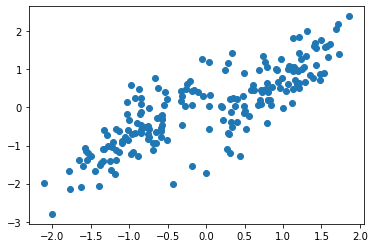

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(d1['x'], d1['y'])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0]


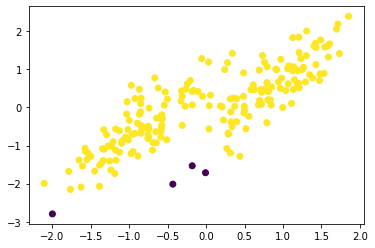

In [ ]:
# dbscan and plot
clustering = DBSCAN(eps=.5, min_samples=3).fit(d1)
labels = clustering.labels_
print(labels)
plt.scatter(d1['x'], d1['y'],c=labels)

In [ ]:
# grab only clustered data points
d1 [labels == 0]

,x,y
0,1.206087,1.847686
1,0.351919,0.245691
2,1.201688,0.630774
3,0.733710,1.364328
4,1.150745,0.724892
...,...,...
195,-1.294810,-0.714977
196,-1.016569,-0.580077
197,-0.503654,0.220184
198,-0.751128,-0.491551


In [ ]:
# overall 
print(f'number of clusrerd data using dbscan {len(d1[labels != -1])}')
print(f'number of outliers dbscan {len(d1[labels == -1])}')

number of clusrerd data using dbscan 196
number of outliers dbscan 4


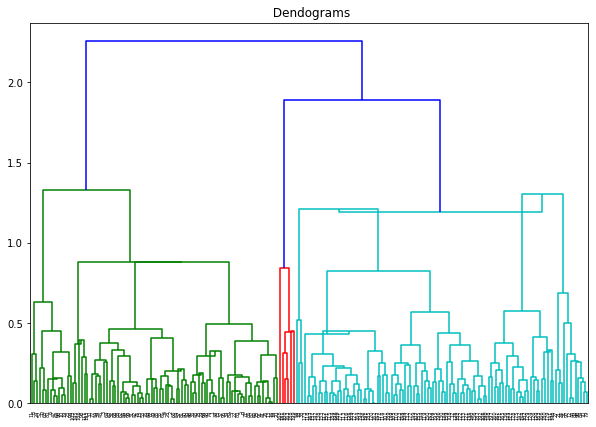

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title(" Dendograms")
dend = shc.dendrogram(shc.linkage(y= d1 , method='centroid',metric='euclidean'),orientation='top') #fill y with your dataframe
                                                                                      #and method with linkage criteria
   

[0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 2 0 0 0 2 0 1 2
 2 1 0 0 0 0 2 2 0 2 0 2 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 2 0 0 2
 2 0 0 0 2 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 1 2 2 0 1 1 1 1 1 1 1
 0 1 1 2 1 1 2 1 1 1 1 1 1 2 1 2 1 1 2 1 2 1 1 1 1 2 1 1 1 1 2 2 2 1 0 2 1
 2 1 1 1 1 1 2 1 1 2 1 1 2 2 1 1 1 2 2 1 1 1 2 1 2 2 1 2 1 1 2 2 2 1 1 2 1
 1 0 1 1 2 1 1 1 0 1 1 1 2 1 1]


Text(0.5, 1.0, 'Hierarchical clustring with K = 3')

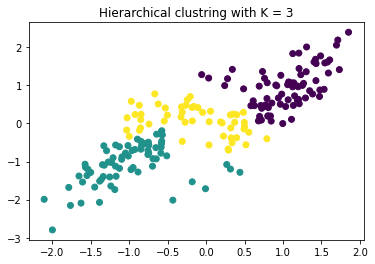

In [ ]:
# Hierarchical Clusteringand plot
from sklearn.cluster import AgglomerativeClustering
clustering_Hc = AgglomerativeClustering(n_clusters=3).fit(d1)
labels_hc = clustering_Hc.labels_
print(labels_hc)
plt.scatter(d1['x'], d1['y'], c= labels_hc)
plt.title('Hierarchical clustring with K = 3')

Text(0, 0.5, 'loss')

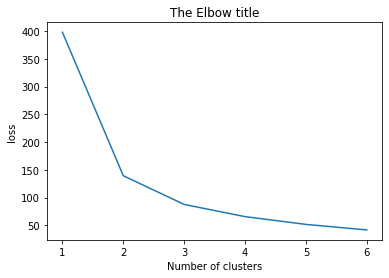

In [ ]:
loss = []
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(d1)
    loss_iter = kmeans.inertia_
    loss.append(loss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,loss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('loss')

[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1]


Text(0.5, 1.0, 'K means clustring with K = 3')

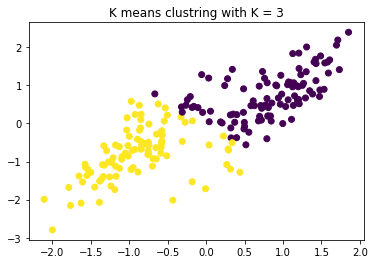

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(2)
kmeans.fit(d1)
identified_clusters = kmeans.fit_predict(d1)
print(identified_clusters)
plt.scatter(d1['x'], d1['y'], c= identified_clusters)
plt.title('K means clustring with K = 3')

Text(0.5, 0, 'n_components K')

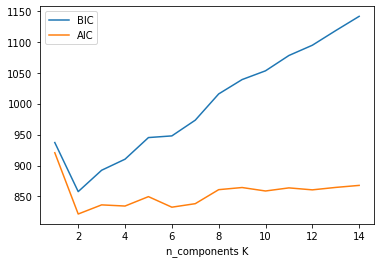

In [ ]:
from sklearn.mixture import GaussianMixture
n_components = np.arange(1, 15)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(d1) for n in n_components]
plt.plot(n_components, [m.bic(d1) for m in models], label='BIC')
plt.plot(n_components, [m.aic(d1) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components K')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Text(0.5, 1.0, 'gaussian mixture clustring with K = 2')

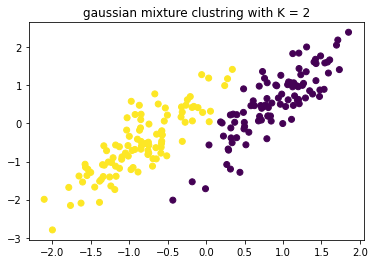

In [ ]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
gmm.fit(d1)
#predictions from gmm
labels_gmm = gmm.predict(d1)
print(labels_gmm)
plt.scatter(d1['x'], d1['y'], c= labels_gmm)
plt.title('gaussian mixture clustring with K = 2')

In [ ]:
# overall review see which cluster technique is better for this DataSet
from sklearn.metrics import silhouette_score
print(f'DBSCAN Silhouette Score is  {silhouette_score(d1,labels)}')
print(f'Hierarchical Silhouette Score whis 3 cluster is  {silhouette_score(d1,labels_hc)}')
print(f'K means clustring Silhouette Score with 3 cluster is  {silhouette_score(d1,identified_clusters)}')
print(f'gaussian mixture clustring Silhouette Score with 2 cluster is  {silhouette_score(d1,labels_gmm)}')

DBSCAN Silhouette Score is  0.24825776725141807
Hierarchical Silhouette Score whis 3 cluster is  0.41567707625984956
K means clustring Silhouette Score with 3 cluster is  0.5319247935472973
gaussian mixture clustring Silhouette Score with 2 cluster is  0.45114087997192326


## Dataset 2

In [ ]:
d2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM2.csv")
d2.head()


,x,y
0,1.578527,1.408111
1,1.748206,0.441915
2,1.523151,0.681521
3,1.318949,0.362971
4,0.977164,-0.373589


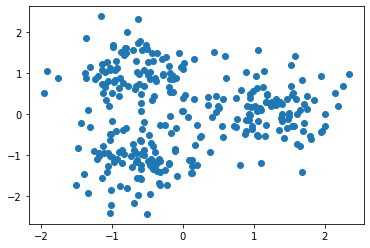

In [ ]:
plt.scatter(d2['x'], d2['y'])

[ 0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0]


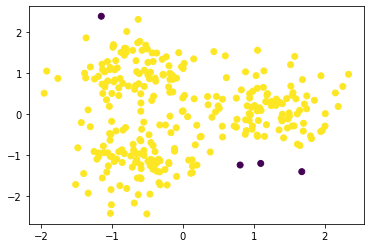

In [ ]:
clustering.fit(d2)
labels = clustering.labels_
print(labels)
plt.scatter(d2['x'], d2['y'],c=labels)

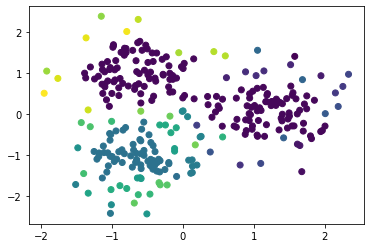

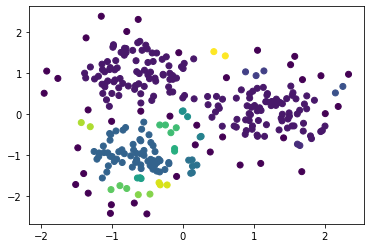

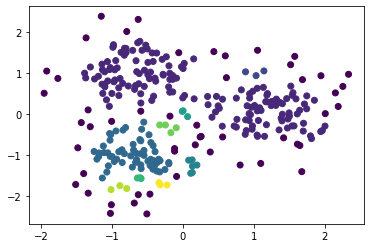

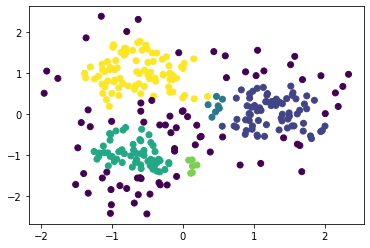

In [ ]:
# dbscan and plot
for i in range(1,5):
  clustering2 = DBSCAN(eps=.2, min_samples = i).fit(d2)
  labels_2 = clustering2.labels_
  # print(labels)
  plt.scatter(d2['x'], d2['y'],c=labels_2)
  plt.show()

In [ ]:
# grab only clustered data points
print(f'clusrerd data : \n {d2[labels_2 != -1]}')
# overall 
print(f'\nnumber of clusrerd data : {len(d2[labels_2 != -1])}')

print(f'number of outliers : {len(d2[labels_2 == -1])}')

clusrerd data : 
             x         y
1    1.748206  0.441915
2    1.523151  0.681521
3    1.318949  0.362971
4    0.977164 -0.373589
5    1.065915 -0.159822
..        ...       ...
294 -0.985342  1.630678
295 -0.522015  1.682249
296 -0.195039  1.177602
297  0.004994  1.111269
299  0.159848  0.369740

[224 rows x 2 columns]

number of clusrerd data : 224
number of outliers : 76


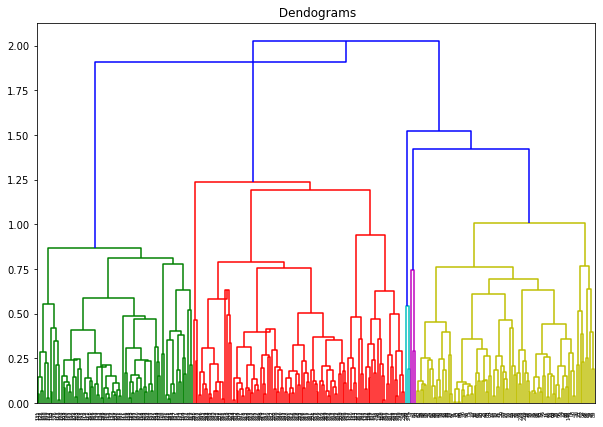

In [ ]:
plt.figure(figsize=(10, 7))
plt.title(" Dendograms")
dend = shc.dendrogram(shc.linkage(y= d2 , method='centroid',metric='euclidean'),orientation='top')

[0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 2 0 0 0 2 0 1 2
 2 1 0 0 0 0 2 2 0 2 0 2 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 2 0 0 2
 2 0 0 0 2 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 1 2 2 0 1 1 1 1 1 1 1
 0 1 1 2 1 1 2 1 1 1 1 1 1 2 1 2 1 1 2 1 2 1 1 1 1 2 1 1 1 1 2 2 2 1 0 2 1
 2 1 1 1 1 1 2 1 1 2 1 1 2 2 1 1 1 2 2 1 1 1 2 1 2 2 1 2 1 1 2 2 2 1 1 2 1
 1 0 1 1 2 1 1 1 0 1 1 1 2 1 1]


Text(0.5, 1.0, 'Hierarchical clustring with K = 3')

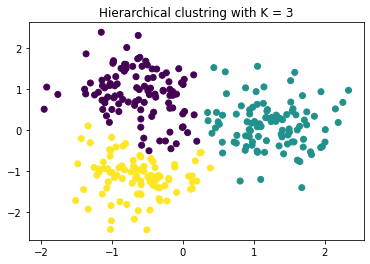

In [ ]:
# Hierarchical Clusteringand plot
from sklearn.cluster import AgglomerativeClustering
clustering_Hc = AgglomerativeClustering(n_clusters=3).fit(d2)
labels_hc2 = clustering_Hc.labels_
print(labels_hc)
plt.scatter(d2['x'], d2['y'], c= labels_hc2)
plt.title('Hierarchical clustring with K = 3')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 3 2 2 2
 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 3 0 3
 2 2 2 2 2 2 2 2 3 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 3 2 3 2 2 2 2 2 2 2 2 2 2 2 1 3 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 3 1 1 1 1 1 1 1 1 3 1 1 0 3 1 3 1 1 1 0 1 3 1 1 1 3 1 3 3
 1 1 3 1 2 1 1 1 1 3 1 1 1 1 1 1 1 3 1 1 1 1 3 1 2 1 1 3 3 1 1 1 1 1 1 1 1
 1 1 1 3]


Text(0.5, 1.0, 'Hierarchical clustring with K = 4')

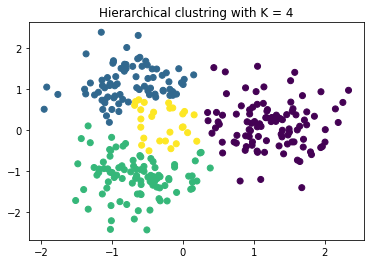

In [ ]:
# Hierarchical Clusteringand plot
from sklearn.cluster import AgglomerativeClustering
clustering_Hc = AgglomerativeClustering(n_clusters=4).fit(d2)
labels_hc = clustering_Hc.labels_
print(labels_hc)
plt.scatter(d2['x'], d2['y'], c= labels_hc)
plt.title('Hierarchical clustring with K = 4')

Text(0, 0.5, 'loss')

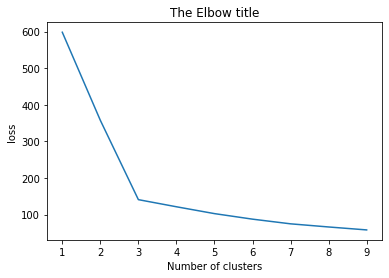

In [ ]:
loss = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(d2)
    loss_iter = kmeans.inertia_
    loss.append(loss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,loss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('loss')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


Text(0.5, 1.0, 'K means clustring with K = 3')

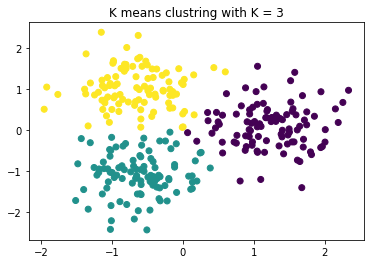

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(3)
kmeans.fit(d2)
identified_clusters2 = kmeans.fit_predict(d2)
print(identified_clusters2)
plt.scatter(d2['x'], d2['y'], c= identified_clusters2)
plt.title('K means clustring with K = 3')

Text(0.5, 0, 'n_components K')

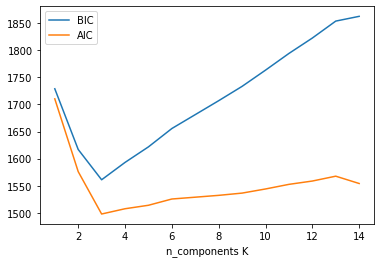

In [ ]:
from sklearn.mixture import GaussianMixture
# find the The optimal number of clusters (K) is the value that minimizes the Akaike information criterion (AIC) 
#or the Bayesian information criterion (BIC).
n_components = np.arange(1, 15)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(d2) for n in n_components]
plt.plot(n_components, [m.bic(d2) for m in models], label='BIC')
plt.plot(n_components, [m.aic(d2) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components K')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


Text(0.5, 1.0, 'gaussian mixture clustring with K = 3')

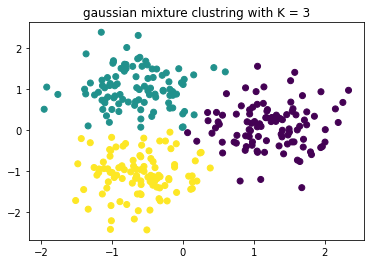

In [ ]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(d2)
#predictions from gmm
labels_gmm2 = gmm.predict(d2)
print(labels_gmm2)
plt.scatter(d2['x'], d2['y'], c= labels_gmm2)
plt.title('gaussian mixture clustring with K = 3')

In [ ]:
# overall review see which cluster technique is better for this DataSet
from sklearn.metrics import silhouette_score
print(f'DBSCAN Silhouette Score is  {silhouette_score(d2,labels_2)}')
print(f'Hierarchical Silhouette Score whis 3 cluster is  {silhouette_score(d2,labels_hc2)}')
print(f'Hierarchical Silhouette Score whis 4 cluster is  {silhouette_score(d2,labels_hc)}')
print(f'K means clustring Silhouette Score with 3 cluster is  {silhouette_score(d2,identified_clusters2)}')
print(f'gaussian mixture clustring Silhouette Score with 3 cluster is  {silhouette_score(d2,labels_gmm2)}')

DBSCAN Silhouette Score is  0.14791516934948498
Hierarchical Silhouette Score whis 3 cluster is  0.5331004784160976
Hierarchical Silhouette Score whis 4 cluster is  0.39221997228762673
K means clustring Silhouette Score with 3 cluster is  0.5583157663135309
gaussian mixture clustring Silhouette Score with 3 cluster is  0.5583157663135309


## Dataset 3

          x         y
0  1.332228  0.178299
1  1.256056  0.146765
2  1.477661  0.155054
3  1.384840  0.022054
4  1.526956  0.267920


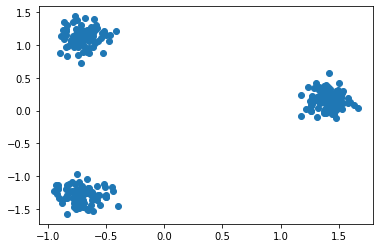

In [ ]:
d3 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM3.csv")
print(d3.head())
plt.scatter(d3['x'], d3['y'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


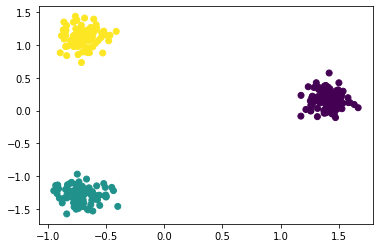

In [ ]:
clustering3 = DBSCAN(eps=.2, min_samples = 2).fit(d3)
labels_3 = clustering3.labels_
print(labels_3)
plt.scatter(d3['x'], d3['y'],c=labels_3)
plt.show()

In [ ]:
# grab only clustered data points
print(f'clusrerd data : \n {d3[labels_3 != -1]}')
# overall 
print(f'\nnumber of clusrerd data : {len(d3[labels_3 != -1])}')

print(f'number of outliers : {len(d3[labels_3 == -1])}')

clusrerd data : 
             x         y
0    1.332228  0.178299
1    1.256056  0.146765
2    1.477661  0.155054
3    1.384840  0.022054
4    1.526956  0.267920
..        ...       ...
295 -0.781903  1.349355
296 -0.607142  1.395445
297 -0.697949  0.998947
298 -0.763402  1.166268
299 -0.685051  0.969685

[300 rows x 2 columns]

number of clusrerd data : 300
number of outliers : 0


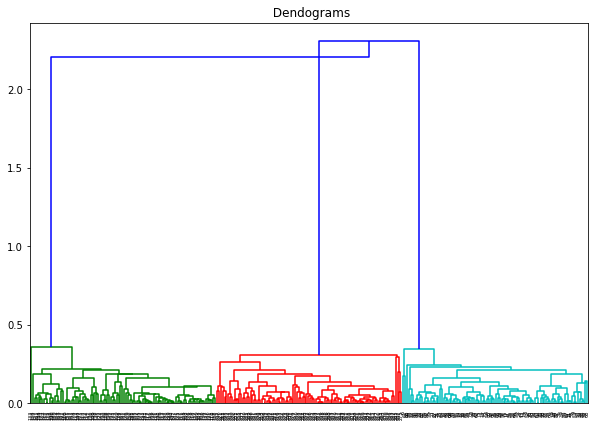

In [ ]:
plt.figure(figsize=(10, 7))
plt.title(" Dendograms")
dend = shc.dendrogram(shc.linkage(y= d3 , method='centroid',metric='euclidean'),orientation='top')

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


Text(0.5, 1.0, 'Hierarchical clustring with K = 3')

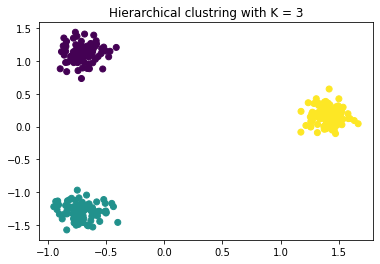

In [ ]:
# Hierarchical Clusteringand plot
clustering_Hc = AgglomerativeClustering(n_clusters=3).fit(d3)
labels_hc3 = clustering_Hc.labels_
print(labels_hc3)
plt.scatter(d3['x'], d3['y'], c= labels_hc3)
plt.title('Hierarchical clustring with K = 3')

Text(0, 0.5, 'loss')

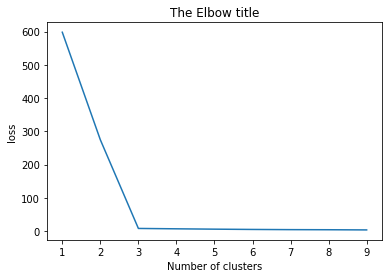

In [ ]:
loss = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(d3)
    loss_iter = kmeans.inertia_
    loss.append(loss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,loss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('loss')

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


Text(0.5, 1.0, 'K means clustring with K = 3')

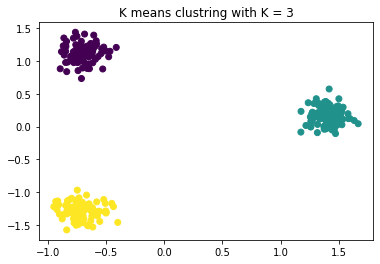

In [ ]:
kmeans = KMeans(3)
kmeans.fit(d3)
identified_clusters3 = kmeans.fit_predict(d3)
print(identified_clusters3)
plt.scatter(d3['x'], d3['y'], c= identified_clusters3)
plt.title('K means clustring with K = 3')

Text(0.5, 0, 'n_components K')

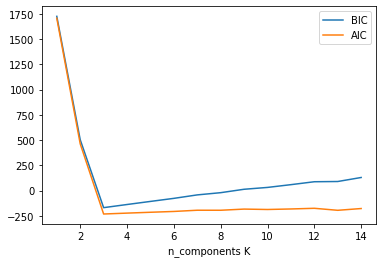

In [ ]:
from sklearn.mixture import GaussianMixture
# find the The optimal number of clusters (K) is the value that minimizes the Akaike information criterion (AIC) 
#or the Bayesian information criterion (BIC).
n_components = np.arange(1, 15)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(d3) for n in n_components]
plt.plot(n_components, [m.bic(d3) for m in models], label='BIC')
plt.plot(n_components, [m.aic(d3) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components K')

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


Text(0.5, 1.0, 'gaussian mixture clustring with K = 3')

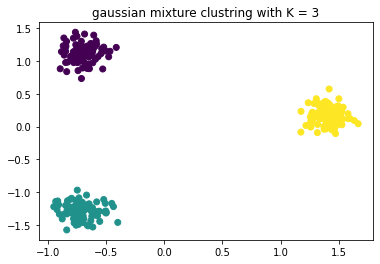

In [ ]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(d3)
#predictions from gmm
labels_gmm3 = gmm.predict(d3)
print(labels_gmm3)
plt.scatter(d3['x'], d3['y'], c= labels_gmm3)
plt.title('gaussian mixture clustring with K = 3')

In [ ]:
# overall review see which cluster technique is better for this DataSet
print(f'DBSCAN Silhouette Score is  {silhouette_score(d3,labels_3)}')
print(f'Hierarchical Silhouette Score whis 3 cluster is  {silhouette_score(d3,labels_hc3)}')
print(f'K means clustring Silhouette Score with 3 cluster is  {silhouette_score(d3,identified_clusters3)}')
print(f'gaussian mixture clustring Silhouette Score with 3 cluster is  {silhouette_score(d3,labels_gmm3)}')

DBSCAN Silhouette Score is  0.913619050733588
Hierarchical Silhouette Score whis 3 cluster is  0.913619050733588
K means clustring Silhouette Score with 3 cluster is  0.913619050733588
gaussian mixture clustring Silhouette Score with 3 cluster is  0.913619050733588


## Dataset 4

In [ ]:
d4 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM4.csv")
print(d4.head())

          x         y
0 -0.006848  0.395527
1  0.314820 -0.289261
2  0.171705  1.078077
3 -1.203661  1.325926
4 -0.179379 -0.036615


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       600 non-null    float64
 1   y       600 non-null    float64
dtypes: float64(2)
memory usage: 9.5 KB


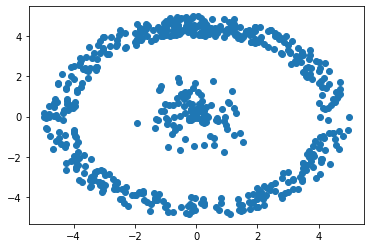

In [ ]:
d4.info()
plt.scatter(d4['x'], d4['y'])

[0 0 0 1 0 0 2 0 0 0 3 4 4 0 0 0 0 0 0 0 0 0 4 0 4 0 0 0 0 0 0 0 0 5 0 0 1
 0 0 0 4 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 4 0 0 1 0 0 0 0 4 0 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 8 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 

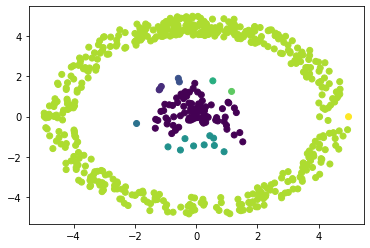

[ 0  0  0  1  0  0  2  0  0  0 -1  3  3  0  0  0  0  0  0  0  0  0  3  0
  3  0  0  0  0  0  0  0  0 -1  0  0  1  0  0  0  3  3  2  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  3  0  0  1  0  0
  0  0  3  0  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4 -1  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4
  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4

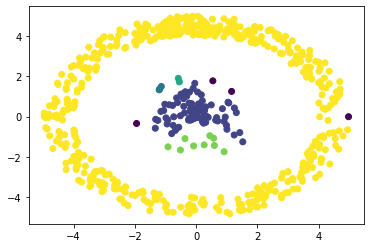

[ 0  0  0  1  0  0 -1  0  0  0 -1  2  2  0  0  0  0  0  0  0  0  0  2  0
  2  0  0  0  0  0  0  0  0 -1  0  0  1  0  0  0  2  2 -1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  2  0  0  1  0  0
  0  0  2  0  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3 -1  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3  3

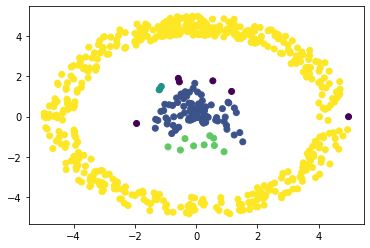

[ 0  0  0 -1  0  0 -1  0  0  0 -1  1  1  0  0  0  0  0  0  0  0  0  1  0
  1  0  0  0  0  0  0  0  0 -1  0  0 -1  0  0  0  1  1 -1  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  1  0  0 -1  0  0
  0  0 -1  0  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 -1  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2

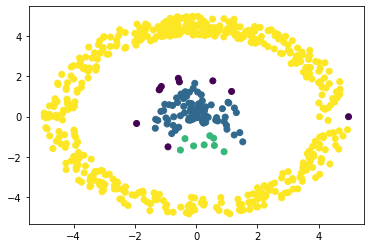

In [ ]:
for i in range(1,5):
  clustering_4 = DBSCAN(eps=.5, min_samples = i).fit(d4)
  labels_4 = clustering_4.labels_
  print(labels_4)
  plt.scatter(d4['x'], d4['y'],c=labels_4)
  plt.show()

In [ ]:
# grab only clustered data points
print(f'clusrerd data : \n {d4[labels_4 != -1]}')
# overall 
print(f'\nnumber of clusrerd data : {len(d4[labels_4 != -1])}')

print(f'number of outliers : {len(d4[labels_4 == -1])}')


clusrerd data : 
             x         y
0   -0.006848  0.395527
1    0.314820 -0.289261
2    0.171705  1.078077
4   -0.179379 -0.036615
5    0.272240  0.276943
..        ...       ...
595  4.189792  1.915447
596 -4.249038 -2.317456
597  3.411690  2.726428
598  3.629434 -2.392112
599 -4.904774 -0.553776

[590 rows x 2 columns]

number of clusrerd data : 590
number of outliers : 10


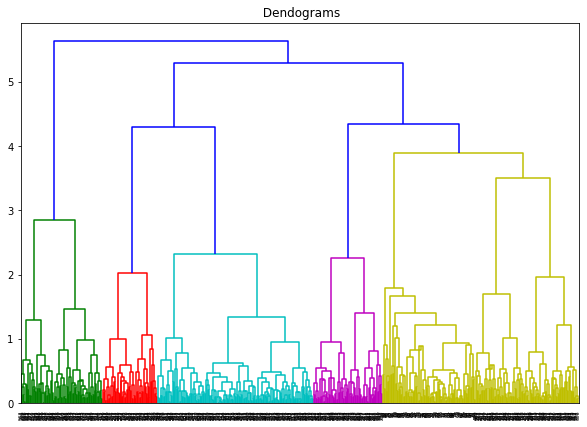

In [ ]:
plt.figure(figsize=(10, 7))
plt.title(" Dendograms")
dend = shc.dendrogram(shc.linkage(y= d4 , method='centroid',metric='euclidean'),orientation='top')

[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 2 0 0 2 2 4 0 3 4 2
 2 3 0 3 1 2 2 1 1 2 4 1 2 0 2 2 2 4 3 4 0 3 4 2 2 3 2 2 0 4 2 0 1 1 0 0 4
 2 2 1 2 0 2 0 1 4 1 2 3 0 0 2 2 3 2 2 3 3 2 1 0 0 3 0 4 3 1 4 1 0 2 4 1 2
 0 2 0 4 2 0 0 3 0 2 2 0 0 1 0 2 4 4 3 4 2 1 2 0 3 4 3 3 0 2 2 1 3 2 0 0 3
 2 1 4 2 4 4 2 2 2 3 2 3 2 2 0 0 4 2 2 3 2 3 2 2 0 4 2 1 3 3 2 0 0 2 4 2 1
 3 2 0 1 3 2 3 0 4 1 3 3 1 4 2 1 1 0 1 0 1 4 1 0 2 2 3 4 2 1 0 0 1 3 4 1 1
 0 0 1 1 0 2 3 0 4 3 3 1 2 0 3 3 2 4 0 2 0 3 2 2 1 2 1 0 1 1 0 3 2 1 2 3 0
 2 0 1 0 3 2 2 4 2 2 3 1 2 3 2 3 2 2 4 1 2 3 1 3 0 2 3 2 4 2 3 1 2 3 2 0 2
 3 2 2 4 3 1 2 2 3 2 1 2 2 2 1 2 2 1 0 3 0 0 1 2 0 0 1 3 2 0 0 2 0 2 3 2 4
 2 1 3 1 2 2 1 3 1 2 0 2 2 1 0 4 2 2 2 2 0 0 1 2 2 3 0 0 2 4 2 1 0 3 2 2 0
 3 1 2 0 4 3 4 3 4 2 0 3 2 3 4 4 2 0 0 2 3 4 4 0 4 0 2 4 1 1 2 2 2 2 0 4 2
 1 3 2 4 0 0 2 1 0 4 0 2 

Text(0.5, 1.0, 'Hierarchical clustring with K = 6')

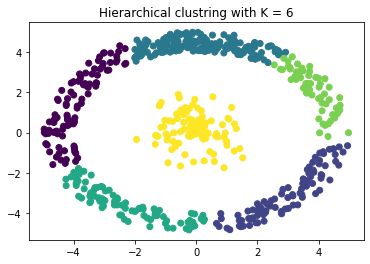

In [ ]:
clustering_Hc = AgglomerativeClustering(n_clusters=6).fit(d4)
labels_hc4 = clustering_Hc.labels_
print(labels_hc4)
plt.scatter(d4['x'], d4['y'], c= labels_hc4)
plt.title('Hierarchical clustring with K = 6')

Text(0, 0.5, 'loss')

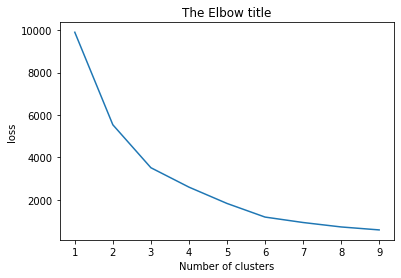

In [ ]:
loss = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(d4)
    loss_iter = kmeans.inertia_
    loss.append(loss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,loss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('loss')

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 1 1 5 5 0 1 2 0 5
 5 2 1 2 3 5 5 3 3 5 0 3 5 1 5 5 5 0 2 0 5 2 0 5 5 2 5 5 1 0 5 1 3 3 1 1 0
 5 0 3 5 1 5 1 3 0 3 5 2 1 1 5 5 2 5 5 2 2 0 3 1 1 2 1 0 2 3 0 3 1 5 0 3 5
 1 5 1 0 5 1 5 2 1 5 5 1 1 3 1 5 0 0 2 0 5 3 5 1 2 0 2 2 1 5 0 3 2 5 1 1 2
 0 3 0 5 0 0 5 0 5 2 0 2 5 5 1 1 0 0 5 2 5 2 5 5 5 0 5 3 2 2 5 1 1 5 0 5 3
 2 5 5 3 2 5 2 5 0 3 2 2 3 0 5 3 3 5 3 1 3 0 3 1 5 5 2 0 5 3 1 1 3 2 0 3 3
 1 1 3 3 1 5 2 1 0 2 2 3 5 1 2 2 5 0 1 0 1 2 5 5 3 5 3 5 3 3 1 2 5 3 5 2 1
 5 1 3 1 2 0 5 0 5 5 2 3 5 2 5 2 5 5 0 3 5 2 3 2 1 0 2 5 0 5 2 3 5 2 5 1 5
 2 5 5 0 2 3 5 5 2 5 3 5 5 5 3 5 5 3 1 2 1 1 3 0 1 1 3 2 5 1 1 5 1 5 2 5 0
 5 3 2 3 5 5 3 2 3 5 1 5 5 3 1 0 5 0 5 5 1 1 3 5 0 2 1 1 5 0 5 3 1 2 5 5 1
 2 3 5 1 0 2 0 2 0 5 1 2 5 2 0 0 5 1 1 5 2 0 0 1 0 5 5 0 3 3 5 5 5 5 1 0 5
 3 2 0 0 5 1 0 3 1 0 1 5 

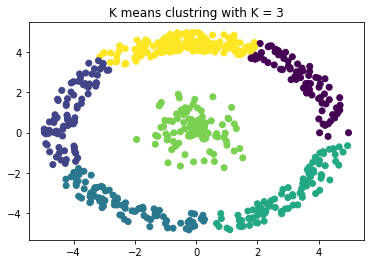

In [ ]:
kmeans = KMeans(6)
kmeans.fit(d4)
identified_clusters4 = kmeans.fit_predict(d4)
print(identified_clusters4)
plt.scatter(d4['x'], d4['y'], c= identified_clusters4)
plt.title('K means clustring with K = 3')
print(f'K means clustring Silhouette Score with 3 cluster is  {silhouette_score(d4,identified_clusters4)}')

Text(0.5, 0, 'n_components K')

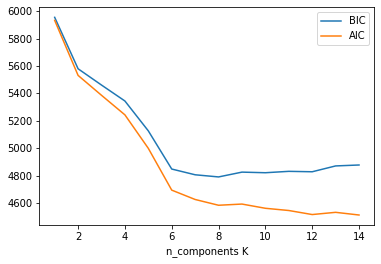

In [ ]:
from sklearn.mixture import GaussianMixture
# find the The optimal number of clusters (K) is the value that minimizes the Akaike information criterion (AIC) 
#or the Bayesian information criterion (BIC).
n_components = np.arange(1, 15)
models = [GaussianMixture(n, covariance_type='full').fit(d4) for n in n_components]
plt.plot(n_components, [m.bic(d4) for m in models], label='BIC')
plt.plot(n_components, [m.aic(d4) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components K')


[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 4 4 1 1 3 4 0 3 1
 1 0 4 0 5 1 1 5 5 1 3 5 1 4 1 1 1 3 0 3 1 0 3 1 1 0 1 1 4 3 1 4 5 5 4 4 3
 1 1 5 1 4 1 4 5 3 5 1 0 4 4 1 1 0 1 1 0 0 3 5 4 4 0 4 3 0 5 3 5 4 1 3 5 1
 4 1 4 3 1 4 1 0 4 1 1 4 4 5 4 1 3 3 0 3 1 5 1 4 0 3 0 0 4 1 3 5 0 1 4 4 0
 1 5 3 1 3 3 1 3 1 0 1 0 1 1 4 4 3 3 1 0 1 0 1 1 4 3 1 0 0 0 1 4 4 1 3 1 5
 0 1 4 5 0 1 0 1 3 5 0 0 5 3 1 5 5 4 5 4 5 3 5 4 1 1 0 3 1 5 4 4 5 0 3 5 5
 4 4 5 5 4 1 0 4 3 0 0 5 1 4 0 0 1 3 4 1 4 0 1 1 5 1 5 4 5 5 4 0 1 5 1 0 4
 1 4 5 4 0 3 1 3 1 1 0 5 1 0 1 0 1 1 3 5 1 0 5 0 4 3 0 1 3 1 0 5 1 0 1 4 1
 0 1 1 3 0 5 1 1 0 1 5 1 1 1 0 1 1 5 4 0 4 4 5 3 4 4 5 0 1 4 4 1 4 1 0 1 3
 1 5 0 5 1 1 5 0 5 1 4 1 1 5 4 3 1 1 1 1 4 4 5 1 1 0 4 4 1 3 1 5 4 0 1 1 4
 0 5 1 4 3 0 3 0 3 1 4 0 1 0 3 3 1 4 4 1 0 3 3 4 3 4 1 3 5 5 1 1 1 1 4 3 1
 5 0 3 3 1 4 1 5 4 3 4 1 

Text(0.5, 1.0, 'gaussian mixture clustring with K = 6')

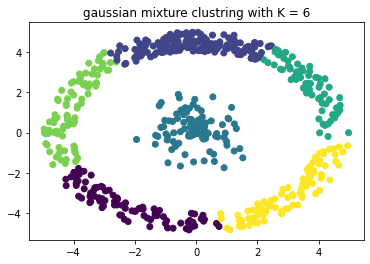

In [ ]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6)
gmm.fit(d4)
#predictions from gmm
labels_gmm4 = gmm.predict(d4)
print(labels_gmm4)
plt.scatter(d4['x'], d4['y'], c= labels_gmm4)
plt.title('gaussian mixture clustring with K = 6')

In [ ]:
# overall review see which cluster technique is better for this DataSet
print(f'DBSCAN Silhouette Score is  {silhouette_score(d4,labels_4)}')
print(f'Hierarchical Silhouette Score whis 6 cluster is  {silhouette_score(d4,labels_hc4)}') # 6 is effective than 5 clusters
print(f'K means clustring Silhouette Score with 6 cluster is  {silhouette_score(d4,identified_clusters4)}')
print(f'gaussian mixture clustring Silhouette Score with 6 cluster is  {silhouette_score(d4,labels_gmm4)}')

DBSCAN Silhouette Score is  -0.1832617593851424
Hierarchical Silhouette Score whis 6 cluster is  0.5374567295884447
K means clustring Silhouette Score with 6 cluster is  0.54467835113421
gaussian mixture clustring Silhouette Score with 6 cluster is  0.5435650848430928


### Compare

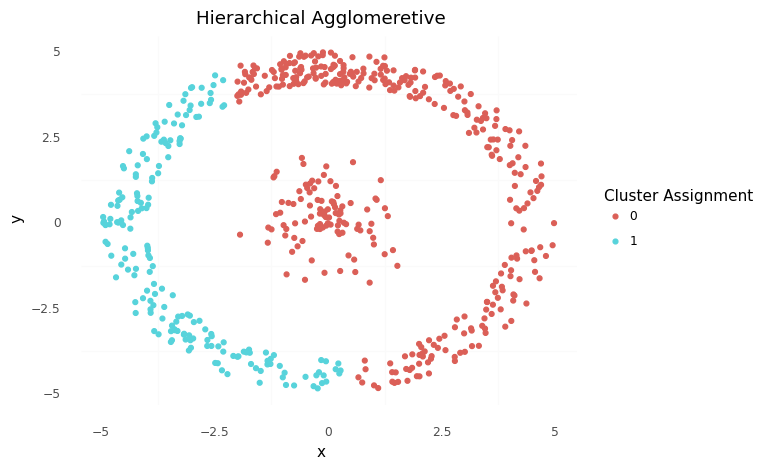

<ggplot: (8764100937273)>


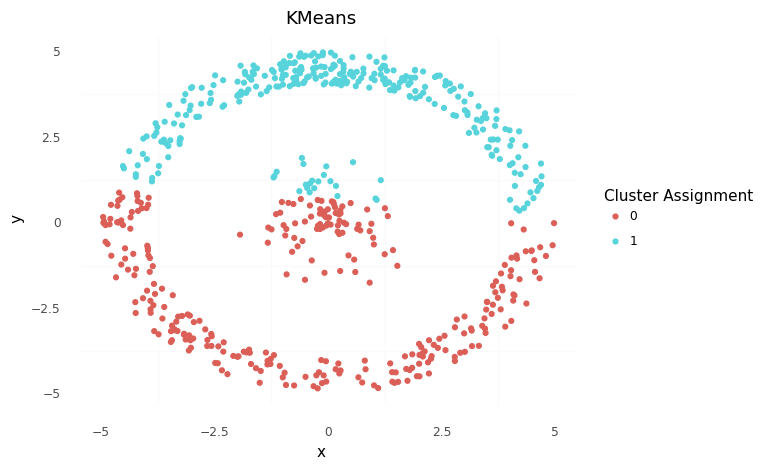

<ggplot: (8764100909741)>


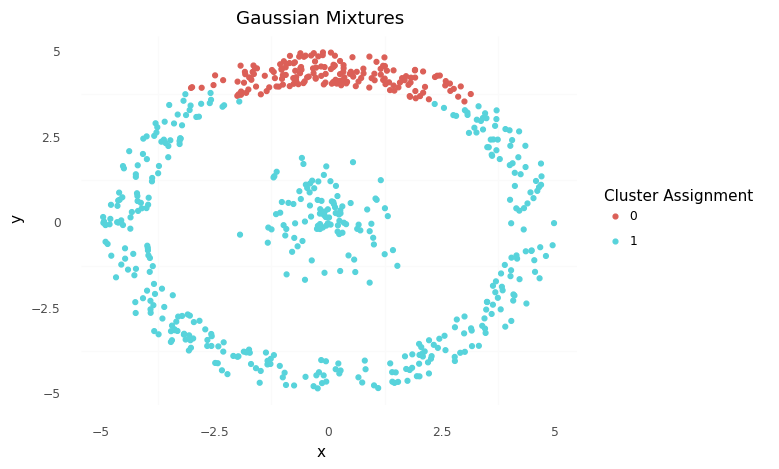

<ggplot: (8764100842001)>


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

hac = AgglomerativeClustering(2)
km = KMeans(2)
gm = GaussianMixture(2)

hac.fit(d4[["x","y"]])
km.fit(d4[["x","y"]])
gm.fit(d4[["x","y"]])

d4["hac"] = hac.labels_
d4["km"] = km.labels_
d4["gm"] = gm.predict(d4[["x","y"]])


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))

## Dataset 5

In [ ]:
d5 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM5.csv")
d5.head()

,x,y
0,2.852449,-0.324568
1,2.346342,-0.729224
2,2.229033,-0.599340
3,2.458669,-0.385467
4,2.844177,-0.196813


In [ ]:
d5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       450 non-null    float64
 1   y       450 non-null    float64
dtypes: float64(2)
memory usage: 7.2 KB


[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2

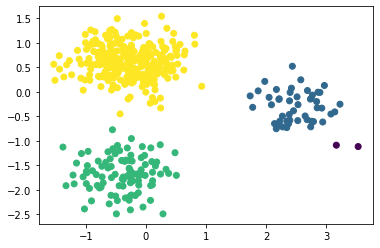

In [ ]:
db5 = DBSCAN(eps = 0.5, min_samples = 15).fit(d5)

labels_5 = db5.labels_
print(labels_5)
plt.scatter(d5['x'], d5['y'],c=labels_5)
plt.show()

In [ ]:
# grab only clustered data points
print(f'clusrerd data : \n {d5[labels_5 != -1]}')
# overall 
print(f'\nnumber of clusrerd data : {len(d5[labels_5 != -1])}')

print(f'number of outliers : {len(d5[labels_5 == -1])}')


clusrerd data : 
             x         y
0    2.852449 -0.324568
1    2.346342 -0.729224
2    2.229033 -0.599340
3    2.458669 -0.385467
4    2.844177 -0.196813
..        ...       ...
445  0.053959  0.314733
446  0.498435  0.833252
447  0.631066  0.446481
448 -0.730062  0.917065
449 -0.390816  0.485814

[448 rows x 2 columns]

number of clusrerd data : 448
number of outliers : 2


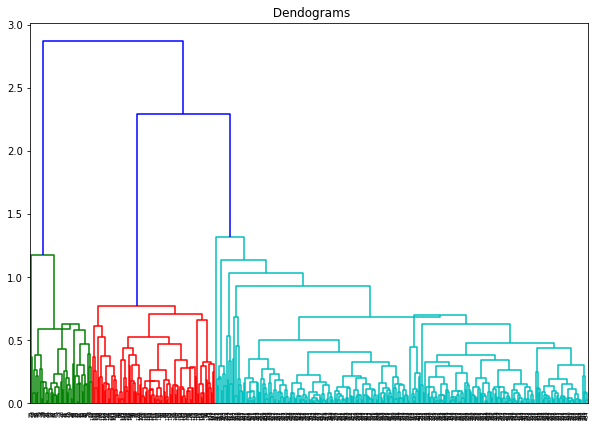

In [ ]:
plt.figure(figsize=(10, 7))
plt.title(" Dendograms")
dend = shc.dendrogram(shc.linkage(y= d5 , method='centroid',metric='euclidean'),orientation='top')

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


Text(0.5, 1.0, 'Hierarchical clustring with K = 3')

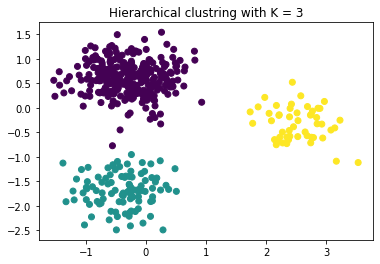

In [ ]:
clustering_Hc = AgglomerativeClustering(n_clusters=3).fit(d5)
labels_hc5 = clustering_Hc.labels_
print(labels_hc5)
plt.scatter(d5['x'], d5['y'], c= labels_hc5)
plt.title('Hierarchical clustring with K = 3')

Text(0, 0.5, 'loss')

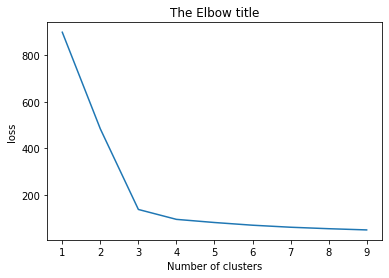

In [ ]:
loss = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(d5)
    loss_iter = kmeans.inertia_
    loss.append(loss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,loss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('loss')

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


Text(0.5, 1.0, 'K means clustring with K = 3')

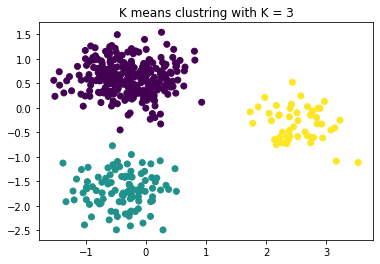

In [ ]:
kmeans = KMeans(3)
kmeans.fit(d5)
identified_clusters5 = kmeans.fit_predict(d5)
print(identified_clusters5)
plt.scatter(d5['x'], d5['y'], c= identified_clusters5)
plt.title('K means clustring with K = 3')

Text(0.5, 0, 'n_components K')

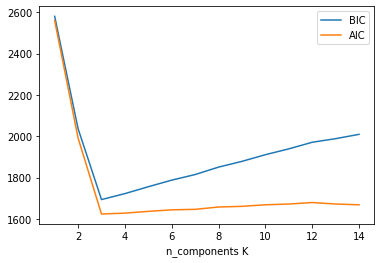

In [ ]:
from sklearn.mixture import GaussianMixture
# find the The optimal number of clusters (K) is the value that minimizes the Akaike information criterion (AIC) 
#or the Bayesian information criterion (BIC).
n_components = np.arange(1, 15)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(d5) for n in n_components]
plt.plot(n_components, [m.bic(d5) for m in models], label='BIC')
plt.plot(n_components, [m.aic(d5) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components K')

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


Text(0.5, 1.0, 'gaussian mixture clustring with K = 3')

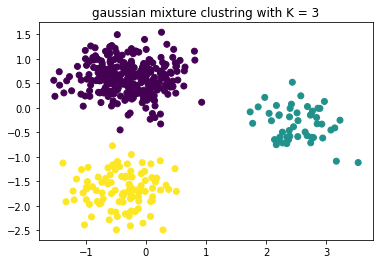

In [ ]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(d5)
#predictions from gmm
labels_gmm5 = gmm.predict(d5)
print(labels_gmm5)
plt.scatter(d5['x'], d5['y'], c= labels_gmm5)
plt.title('gaussian mixture clustring with K = 3')

In [ ]:
# overall review see which cluster technique is better for this DataSet
print(f'DBSCAN Silhouette Score is  {silhouette_score(d5,labels_5)}')
print(f'Hierarchical Silhouette Score whis 3 cluster is  {silhouette_score(d5,labels_hc5)}')
print(f'K means clustring Silhouette Score with 3 cluster is  {silhouette_score(d5,identified_clusters5)}')
print(f'gaussian mixture clustring Silhouette Score with 3 cluster is  {silhouette_score(d5,labels_gmm5)}')

DBSCAN Silhouette Score is  0.6714107830551044
Hierarchical Silhouette Score whis 3 cluster is  0.7031189213721806
K means clustring Silhouette Score with 3 cluster is  0.7043537508086658
gaussian mixture clustring Silhouette Score with 3 cluster is  0.7043537508086658


# Elbow Method

Read more [here](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf) if math excites you.

## Dataset 6

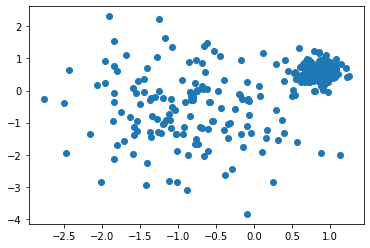

In [ ]:
d6 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM6.csv")
d6.head()
plt.scatter(d6['x'], d6['y'])
plt.show()

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  1  1  1 -1  1  1  1 -1  3  0 -1  1  1  1  1  1  1  1
  1 -1  1  1  1  1  0  0 -1  1 -1 -1  1  1  1  0 -1  1  1  1 -1  1 -1  1
  1  1 -1  1 -1  1 -1 -1 -1 -1  1  1  1  1  0 -1  1 -1  1  1  1 -1  1  1
  1  2  1  1 -1 -1  1  1 -1  3  1 -1  1  1 -1  1  1  1  0  1  1  1  1  1
  1  1  1  1 -1  1  1  1  1  1 -1 -1  1  2  1  3 -1  1  1  0  1  1  1 -1
  1  1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1  1  1 -1 -1 -1  2  1 -1  1  1 -1
 -1 -1 -1  2  1  1  1  3  1  1 -1 -1]


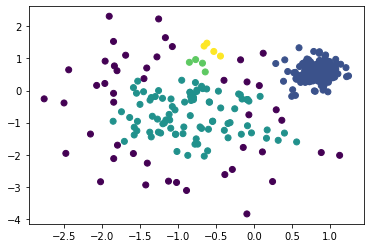

In [ ]:
db6 = DBSCAN(eps = 0.3, min_samples = 4).fit(d6) # tray many this is best 
labels_6 = db6.labels_
print(labels_6)
plt.scatter(d6['x'], d6['y'],c=labels_6)
plt.show()

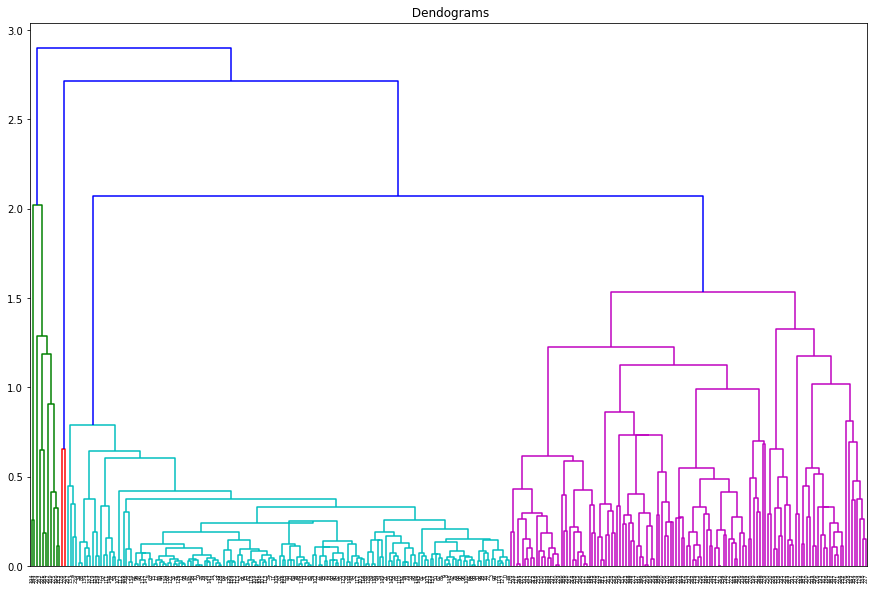

In [ ]:
plt.figure(figsize=(15, 10))
plt.title(" Dendograms")
dend = shc.dendrogram(shc.linkage(y= d6 , method='centroid',metric='euclidean'),orientation='top')

[3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 4 1 4 2 0 4 1 2 2 3 4 4 4 0 0 0 1 0 1 1 4 4 0 0 3 3 2 0 2 2 4 4 1 3 0
 0 0 1 2 0 1 1 4 0 1 4 4 1 1 0 0 0 0 0 0 4 3 0 4 0 1 1 4 1 4 1 0 2 4 1 0 1
 0 0 1 2 0 2 0 4 2 0 0 4 3 4 0 0 1 0 1 1 4 4 1 0 4 0 0 1 2 0 0 2 0 2 4 1 4
 2 1 1 0 1 1 0 4 0 1 1 0 0 0 1 2 1 2 4 1 0 1 0 4 1 2 4 0 2 4 0 0 2 0 0 4 2
 0 4 2 4]


Text(0.5, 1.0, 'Hierarchical clustring with K = 5')

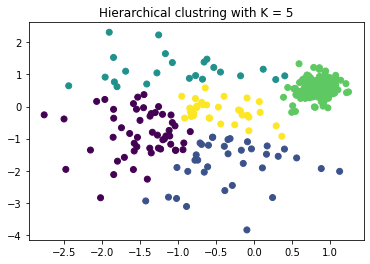

In [ ]:
clustering_Hc = AgglomerativeClustering(n_clusters=5).fit(d6)
labels_hc6 = clustering_Hc.labels_
print(labels_hc6)
plt.scatter(d6['x'], d6['y'], c= labels_hc6)
plt.title('Hierarchical clustring with K = 5')

[3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 0 1 0 0 2 0 1 0 0 3 0 0 0 2 2 2 1 2 1 1 0 0 2 2 3 3 0 2 0 0 0 0 1 3 2
 2 2 1 0 2 1 1 0 2 1 0 0 1 1 2 2 2 2 2 2 0 3 2 0 2 1 1 0 1 0 1 2 0 0 1 2 1
 2 2 1 0 2 0 2 0 0 2 2 0 3 0 2 2 1 2 1 1 0 0 1 2 0 2 2 1 0 2 2 0 2 0 0 1 0
 0 1 1 2 1 1 2 0 2 1 1 2 2 2 1 0 1 0 0 1 2 1 2 0 1 0 0 2 0 0 2 2 0 2 2 0 0
 2 0 0 0]


Text(0.5, 1.0, 'Hierarchical clustring with K = 4')

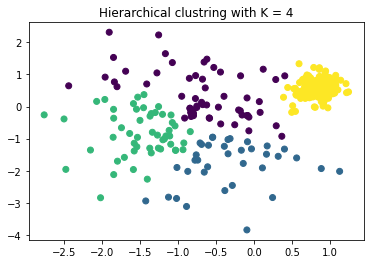

In [ ]:
clustering_Hc = AgglomerativeClustering(n_clusters=4).fit(d6)
labels_hc6_2 = clustering_Hc.labels_
print(labels_hc6_2)
plt.scatter(d6['x'], d6['y'], c= labels_hc6_2)
plt.title('Hierarchical clustring with K = 4')

Text(0, 0.5, 'loss')

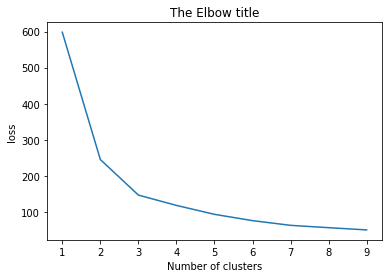

In [ ]:
loss = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(d6)
    loss_iter = kmeans.inertia_
    loss.append(loss_iter)

number_clusters = range(1,10)
plt.plot(number_clusters,loss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('loss')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 2 1 0 2 1 2 1 1 0 1 1 1 1 2 2 2 1 2 2 1 1 2 2 0 0 1 2 1 1 1 0 2 0 1
 2 1 2 1 2 2 2 1 1 2 2 2 2 2 2 1 2 2 1 2 1 0 1 1 2 2 2 1 2 1 2 1 1 1 2 1 2
 2 2 2 1 1 1 1 1 1 1 1 1 0 1 2 2 2 2 2 2 1 1 2 2 1 1 1 2 1 1 2 1 2 1 0 2 1
 0 2 2 1 2 2 2 0 2 2 2 2 1 2 2 1 2 1 1 2 2 2 1 1 2 1 1 2 0 0 2 1 1 2 2 1 1
 2 1 1 2]


Text(0.5, 1.0, 'K means clustring with K = 3')

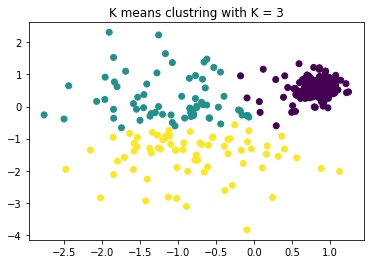

In [ ]:
kmeans = KMeans(3)
kmeans.fit(d6)
identified_clusters6 = kmeans.fit_predict(d6)
print(identified_clusters6)
plt.scatter(d6['x'], d6['y'], c= identified_clusters6)
plt.title('K means clustring with K = 3')

Text(0.5, 0, 'n_components K')

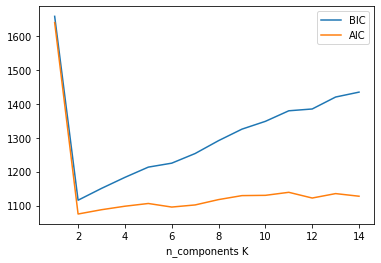

In [ ]:
from sklearn.mixture import GaussianMixture
# find the The optimal number of clusters (K) is the value that minimizes the Akaike information criterion (AIC) 
#or the Bayesian information criterion (BIC).
n_components = np.arange(1, 15)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(d6) for n in n_components]
plt.plot(n_components, [m.bic(d6) for m in models], label='BIC')
plt.plot(n_components, [m.aic(d6) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components K')

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


Text(0.5, 1.0, 'gaussian mixture clustring with K = 2')

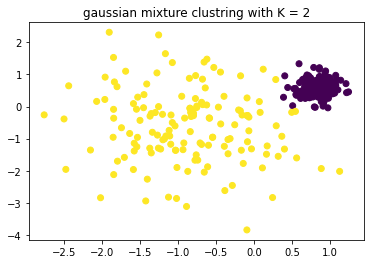

In [ ]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2)
gmm.fit(d6)
#predictions from gmm
labels_gmm6 = gmm.predict(d6)
print(labels_gmm6)
plt.scatter(d6['x'], d6['y'], c= labels_gmm6)
plt.title('gaussian mixture clustring with K = 2')

In [ ]:
 # overall review see which cluster technique is better for this DataSet
print(f'DBSCAN Silhouette Score is  {silhouette_score(d6,labels_6)}')
print(f'Hierarchical Silhouette Score whis 5 cluster is  {silhouette_score(d6,labels_hc6)}')
print(f'Hierarchical Silhouette Score whis 4 cluster is  {silhouette_score(d6,labels_hc6_2)}')
print(f'K means clustring Silhouette Score with 3 cluster is  {silhouette_score(d6,identified_clusters6)}')
print(f'gaussian mixture clustring Silhouette Score with 2 cluster is  {silhouette_score(d6,labels_gmm6)}')

DBSCAN Silhouette Score is  0.4282727379273726
Hierarchical Silhouette Score whis 5 cluster is  0.5281080978125063
Hierarchical Silhouette Score whis 4 cluster is  0.523189638823892
K means clustring Silhouette Score with 3 cluster is  0.5861497443577425
gaussian mixture clustring Silhouette Score with 2 cluster is  0.5531426830972708


In [ ]:
# we ask for 4 nearest, because the data point it self (distance = 0) is included


In [ ]:
# sort the distances


In [ ]:
#plot the distances
